<a href="https://colab.research.google.com/github/metamath1/noviceml/blob/master/CHAP_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6장 그림 및 예제 코드

In [ ]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm
import sympy

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [ ]:
# 데이터 파일 사용을 위한 github repo 복사
# !주의! 
# 구글 colab 환경에서 실행하는 경우만 실행하세요.
# 로컬환경에서는 실행하지 마세요.
!git clone -l -s https://github.com/metamath1/noviceml.git noviceml

Cloning into 'noviceml'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 74 (delta 10), reused 12 (delta 2), pack-reused 48
Unpacking objects: 100% (74/74), done.


In [ ]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

# 로컬 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
# https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html
# 아래 코드의 주석 제거 후 경로를 유저 컴퓨터의 폰트 파일 경로로 수정하세요.
# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# fontprop = mfm.FontProperties(fname=path, size=18)

## 심파이를 사용한 미분


$$
(x^2 + 2x) \log x
$$

In [ ]:
x = sympy.Symbol('x') 
f = (x**2 + 2*x)*sympy.log(x) 
df = sympy.diff(f, x) 
df
# >>> (2*x+2)*log(x) + (x**2 + 2*x)/x

(2*x + 2)*log(x) + (x**2 + 2*x)/x

In [ ]:
sympy.simplify(df)
# >>> x + 2*(x + 1)*log(x) + 2


x + 2*(x + 1)*log(x) + 2

- 직접 미분을 사용하면 위 결과를 이용하여 함수를 선언하고 그대로 사용

In [ ]:
f  = lambda x : (x**2 + 2*x)*np.log(x)
df = lambda x : (2*x+2)*np.log(x) + (x+2)

print(f(1))
print(df(1))

0.0
3.0


## 수치미분

In [ ]:
############################################################
# 수치미분함수
############################################################
def numer_deriv(f, x, h=0.001, method="center") :
    """
    {f(x+h) - f(x)} / h을 수치적으로 계산한다.
    
    
    f      : 미분할 함수로 주어진 위치에서 함수값 계산을 위해 사용
    x      : 미분계수를 구할 변수의 위치로 
             일변수인 경우 int 또는 float 
             다변수인 경우 넘파이 어레이 (d,) 벡터
    h      : 비율을 구할 작은 구간
    """
    if type(x) in (float, int) :    # ---- [1]
        grad = [0.0]
        x_ = [x]
        var_type = 'scalar'
    else :
        grad = np.zeros(x.shape)    # ---- [2]
        x_ = x.copy().astype('float32') 
        var_type = 'vector'
    
    for i, xi in enumerate(x_) :    # ---- [3]
        original_value = x_[i]
        
        if method=='forward' :    # ---- [4]
            x_[i] = original_value + h
        else :
            x_[i] = original_value + (h/2)
        
        if var_type == 'scalar' :    # ---- [5]   
            gradplus = f(x_[i])
        else :
            gradplus = f(x_)
        
        if method=='forward' :    # ---- [6]   
            x_[i] = original_value
        else:
            x_[i] = original_value - (h/2)
        
        if var_type == 'scalar' :
            gradminus = f(x_[i])
        else :
            gradminus = f(x_)
        
        grad[i] = (gradplus - gradminus) / h    # ---- [7]
    
    if var_type == 'scalar' :    # ---- [8]
        return grad[0]
    else :
        return grad

In [ ]:
print(numer_deriv(f, 1, h=0.5, method="forward"))
print(numer_deriv(f, 1, h=0.5, method="center"))

4.257383635135726
2.9997299032915508


## 그림 6-1

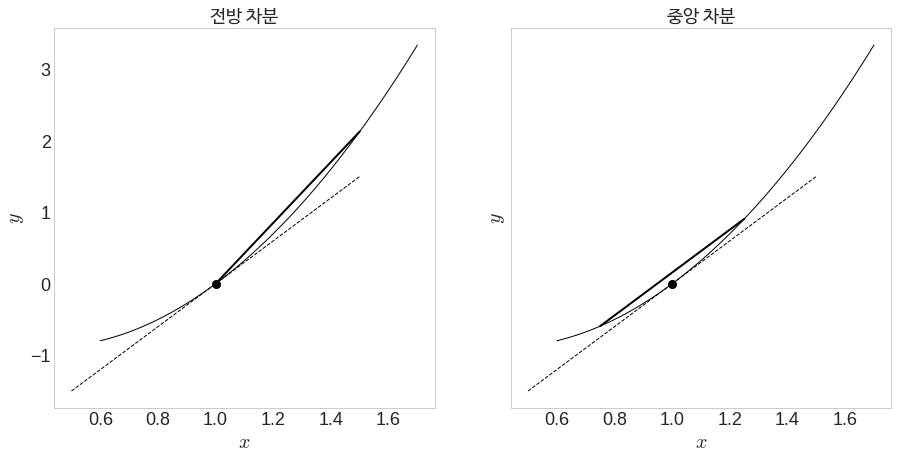

In [ ]:
f  = lambda x : (x**2 + 2*x)*np.log(x)
df = lambda x : (2*x+2)*np.log(x) + (x+2)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,7))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)
ax2.grid(False)

x = np.linspace(0.6, 1.7, 100)
x0 = 1.0
h = 0.5

ax1.plot(x, f(x), color='k', lw=1)
ax1.set_title("전방 차분", fontproperties=fontprop)
ax1.plot(x0, f(x0), 'o', markersize=8, color='k', zorder=3)
ax1.plot([x0-h, x0+h], [f(x0)-df(x0)*h, f(x0)+df(x0)*h], '--', lw=1, color='k')
ax1.plot([x0, x0+h], [f(x0), f(x0+h)], lw=2, color='k')
ax1.set_xlabel(r'$x$', fontsize=20)
ax1.set_ylabel(r'$y$', fontsize=20)

ax2.plot(x, f(x), color='k', lw=1)
ax2.set_title("중앙 차분", fontproperties=fontprop)
ax2.plot(x0, f(x0), 'o', markersize=8, color='k', zorder=3)
ax2.plot([x0-h, x0+h], [f(x0)-df(x0)*h, f(x0)+df(x0)*h], '--', lw=1, color='k')
ax2.plot([x0-h/2, x0+h/2], [f(x0-h/2), f(x0+h/2)], lw=2, color='k')
ax2.set_xlabel(r'$x$', fontsize=20)
ax2.set_ylabel(r'$y$', fontsize=20)  

if file_print == True :
    fig.savefig("imgs/chap6/fig6-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap6/fig6-1.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 식(6.5) 미분

$$
f(x,y)=(x^2+2x)\ln{y}
$$

In [ ]:
f_xy  = lambda x : (x[0]**2 + 2*x[0])*np.log(x[1])
numer_deriv(f_xy, np.array([1, 2]))

array([2.7726, 1.4989])

In [ ]:
x = sympy.Symbol('x') 
y = sympy.Symbol('y') 
f_xy_sympy = (x**2 + 2*x)*sympy.log(y) 
df_xy_x = sympy.diff(f_xy_sympy, x) 
df_xy_y = sympy.diff(f_xy_sympy, y)

print(df_xy_x)
print(df_xy_y)

print("{:.4f}".format(df_xy_x.evalf(subs={x:1.0, y:2.0})))
print("{:.4f}".format(df_xy_y.evalf(subs={x:1.0, y:2.0})))

(2*x + 2)*log(y)
(x**2 + 2*x)/y
2.7726
1.5000


## 자동미분

### 파이토치

In [ ]:
import torch # 파이토치 불러오기

#### 텐서

In [ ]:
np.random.seed(0) # 랜덤 어레이 생성에서 늘 같은 결과가 나오게 하기 위해

x = np.random.rand(6).reshape(2,3)

x_tensor = torch.tensor(x)
x_from_numpy = torch.from_numpy(x)
x_Tensor = torch.Tensor(x)
x_as_tensor = torch.as_tensor(x)

print(x, x.dtype)
print(x_tensor, x_tensor.dtype, x_tensor.requires_grad)
print(x_from_numpy, x_from_numpy.dtype, x_from_numpy.requires_grad)
print(x_Tensor, x_Tensor.dtype, x_Tensor.requires_grad)
print(x_as_tensor, x_as_tensor.dtype, x_as_tensor.requires_grad)

[[0.5488 0.7152 0.6028]
 [0.5449 0.4237 0.6459]] float64
tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]], dtype=torch.float64) torch.float64 False
tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]], dtype=torch.float64) torch.float64 False
tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]]) torch.float32 False
tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]], dtype=torch.float64) torch.float64 False


In [ ]:
x[0,0] = 100

print(x, x.dtype)
print(x_tensor, x_tensor.dtype, x_tensor.requires_grad)
print(x_from_numpy, x_from_numpy.dtype, x_from_numpy.requires_grad)
print(x_Tensor, x_Tensor.dtype, x_Tensor.requires_grad)
print(x_as_tensor, x_as_tensor.dtype, x_as_tensor.requires_grad)

[[100.       0.7152   0.6028]
 [  0.5449   0.4237   0.6459]] float64
tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]], dtype=torch.float64) torch.float64 False
tensor([[100.0000,   0.7152,   0.6028],
        [  0.5449,   0.4237,   0.6459]], dtype=torch.float64) torch.float64 False
tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]]) torch.float32 False
tensor([[100.0000,   0.7152,   0.6028],
        [  0.5449,   0.4237,   0.6459]], dtype=torch.float64) torch.float64 False


In [ ]:
x_tensor_grad = torch.tensor(x, requires_grad=True)

print(x_tensor_grad, x_tensor_grad.dtype, x_tensor_grad.requires_grad)

tensor([[100.0000,   0.7152,   0.6028],
        [  0.5449,   0.4237,   0.6459]], dtype=torch.float64,
       requires_grad=True) torch.float64 True


In [ ]:
x = torch.tensor([1.0], requires_grad=True)
f = (x**2 + 2*x) * torch.log(x)

print(x)
print(f)
print(x.grad)

print(x.grad_fn)
print(f.grad_fn)

tensor([1.], requires_grad=True)
tensor([0.], grad_fn=<MulBackward0>)
None
None


In [ ]:
# x가 마지막 노드인가? 
# backward()함수는 마지막 노드까지 역전파하면서 미분계수를 구한다.
print(x.is_leaf)

True


#### torch.autograd.backward

In [ ]:
torch.autograd.backward(f, grad_tensors=torch.tensor([1.]), retain_graph=True)
print(x.grad)

tensor([3.])


#### torch.autograd.grad

In [ ]:
df = torch.autograd.grad(f, x, retain_graph=True)
print(df)

(tensor([3.]),)


In [ ]:
print(x.grad)

tensor([3.])


#### 식(6.5) 파이토치로 미분

In [ ]:
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)
f_xy = (x**2 + 2*x) * torch.log(y)

torch.autograd.backward(f_xy, retain_graph=True)
print(x.grad)
print(y.grad)

df = torch.autograd.grad(f_xy, (x,y), retain_graph=True)
print(df)

tensor([2.7726])
tensor([1.5000])
(tensor([2.7726]), tensor([1.5000]))


### 자동미분 구현

In [ ]:
def times(x, y):
    return x*y, (x,y)

def times_deriv(cache, dout=1):
    return cache[1]*dout, cache[0]*dout

TIMES = {'f': times, 'df': times_deriv}

v, cache = TIMES['f'](2,3)
dx, dy = TIMES['df'](cache)

print("dx={}, dy={}".format(dx, dy))

dx=3, dy=2


In [ ]:
def add(x, y):
    return x+y, (x,y)

def add_deriv(cache, dout=1):
    return dout, dout

ADD = {'f': add, 'df': add_deriv}

def log(x):
    return np.log(x), x

def log_deriv(cache, dout=1):
    return (1/cache)*dout

LOG = {'f': log, 'df': log_deriv}

In [ ]:
x = 1.; y = 2.

a, cache_a = TIMES['f'](x, x)
b, cache_b = TIMES['f'](2, x)
c, cache_c = ADD['f'](a, b)
d, cache_d = LOG['f'](y)
z, cache_z = TIMES['f'](c, d)

print("forward pass f(x) = {:.6f}".format(z))

dx = dy = 0.
dc, dd = TIMES['df'](cache_z, 1)
dy = LOG['df'](cache_d, dd)
da, db = ADD['df'](cache_c, dc)
_, dx_ = TIMES['df'](cache_b, db); dx+=dx_;
dx_, dx__ = TIMES['df'](cache_a, da); dx+=dx_+dx__;


print("backward pass dx = {:.6f}, dy = {:.6f}".format(dx, dy))


forward pass f(x) = 2.079442
backward pass dx = 2.772589, dy = 1.500000


- 수치 미분으로 위 자동 미분 결과를 확인

In [ ]:
def f_xy(x):
    return (x[0]*x[0] + 2*x[0])*np.log(x[1])

numer_deriv(f_xy, np.array([1, 2]), method="center")

array([2.7726, 1.4989])

- 파이토치로 상류층 미분계수를 2로 주고 미분한 경우

In [ ]:
x = torch.tensor([1.], requires_grad=True)
y = torch.tensor([2.], requires_grad=True)

z = (x**2 + 2*x)*torch.log(y)

dz = torch.autograd.grad(z, (x,y), grad_outputs=torch.tensor([2.]), retain_graph=True)
print(dz)

(tensor([5.5452]), tensor([3.]))
